In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

lab3_data = sns.load_dataset('titanic')
lab3_data.loc[(lab3_data['who'] == 'child') & (lab3_data['sex'] == 'male'), 'who'] = 'boy'
lab3_data.loc[(lab3_data['who'] == 'child') & (lab3_data['sex'] == 'female'), 'who'] = 'girl'
lab3_data.loc[lab3_data['survived'] == 0, 'survived_str'] = 'no'
lab3_data.loc[lab3_data['survived'] == 1,  'survived_str'] = 'yes'

lab3_data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,survived_str
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,no
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,yes
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,yes
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,yes
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,no
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,yes
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,no
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,yes


# Plot #1

In [ ]:
sns.set_style("white")
sns.set_context("paper")

colscheme = {'man':'blue','woman':'tab:orange','boy':'cornflowerblue','girl':'sandybrown'}

<Axes: xlabel='class', ylabel='survived'>

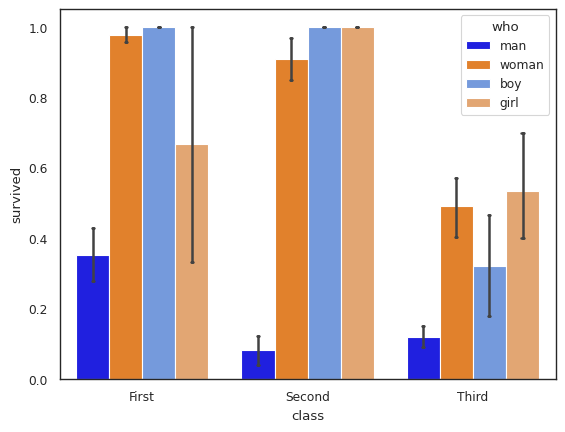

In [ ]:
sns.barplot(data=lab3_data, x='class', y='survived', hue='who', capsize=0.05, errorbar=('ci', 90), palette=colscheme)

<Axes: xlabel='class', ylabel='survived'>

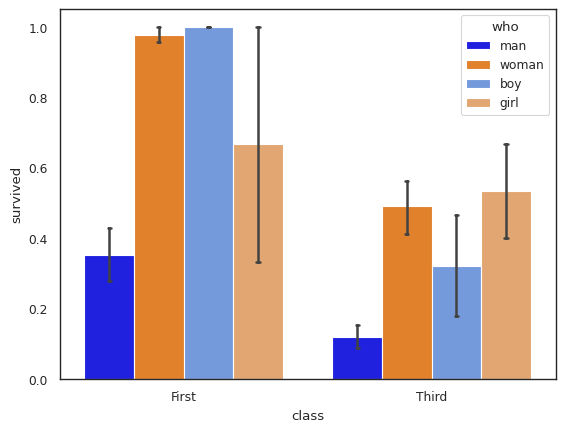

In [ ]:
sns.barplot(data=lab3_data, x='class', y='survived', hue='who', capsize=0.05, errorbar=('ci', 90), palette=colscheme,
            order=['First', 'Third'])

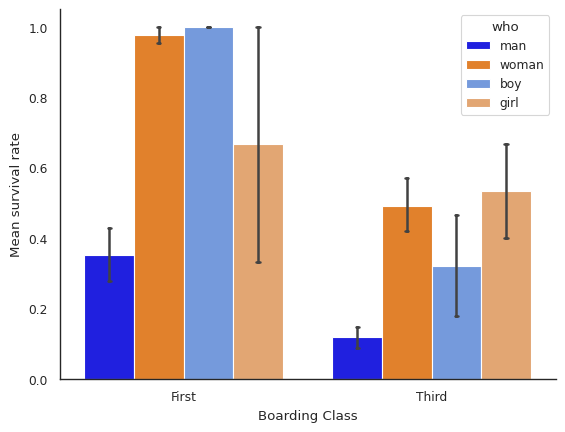

In [ ]:
axes=sns.barplot(data=lab3_data, x='class', y='survived', hue='who', capsize=0.05, errorbar=('ci', 90), palette=colscheme,
                 order=['First', 'Third'])
axes.set(xlabel='Boarding Class', ylabel='Mean survival rate')
sns.despine()

# Plot #2

<Axes: xlabel='survived_str', ylabel='age'>

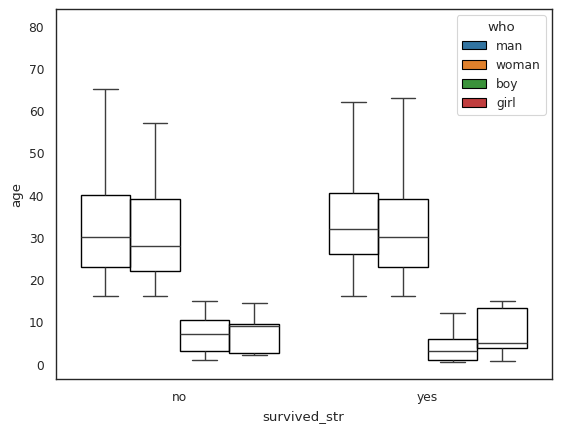

In [ ]:
sns.boxplot(data=lab3_data, x='survived_str', y='age', hue='who', boxprops={'edgecolor':'black','facecolor':(1,1,1,0)},
            fliersize=0)

<Axes: xlabel='survived_str', ylabel='age'>

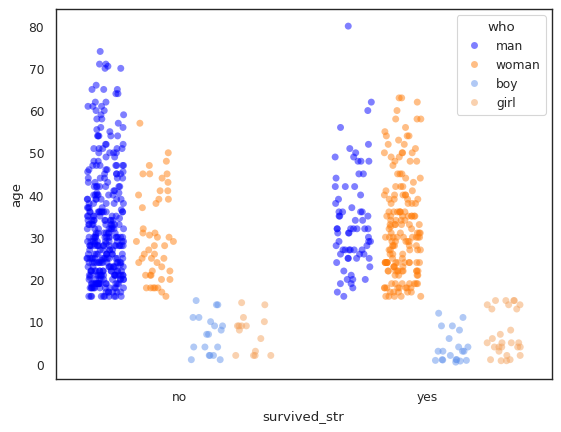

In [ ]:
sns.stripplot(data=lab3_data, x='survived_str', y='age', hue='who', jitter=0.3, alpha=0.5, dodge='true',
              palette=colscheme)

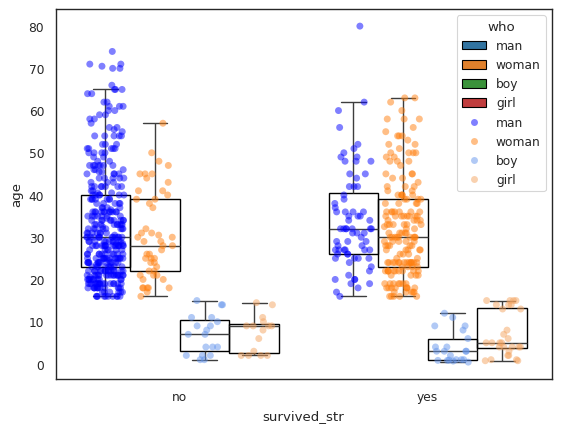

In [ ]:
axes2 = sns.boxplot(data=lab3_data, x='survived_str', y='age', hue='who', boxprops={'edgecolor':'black','facecolor':(1,1,1,0)},
                    fliersize=0)
axes2 = sns.stripplot(data=lab3_data, x='survived_str', y='age', hue='who', jitter=0.3, alpha=0.5, dodge='true',
                      palette=colscheme)

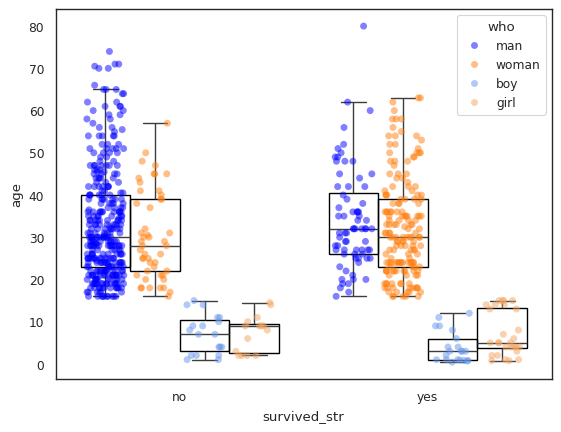

In [ ]:
sns.boxplot(data=lab3_data, x='survived_str', y='age', hue='who', boxprops={'edgecolor':'black','facecolor':(1,1,1,0)},
            fliersize=0)
sns.stripplot(data=lab3_data, x='survived_str', y='age', hue='who', jitter=0.3, alpha=0.5, dodge='true',
              palette=colscheme)

handles, labels = axes2.get_legend_handles_labels()
plt.legend(handles[4:8], labels[4:8], title='who')

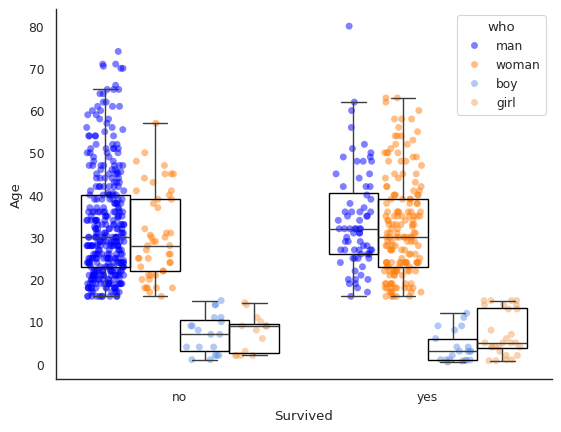

In [ ]:
axes2 = sns.boxplot(data=lab3_data, x='survived_str', y='age', hue='who', boxprops={'edgecolor':'black','facecolor':(1,1,1,0)},
                    fliersize=0, zorder=5)
axes2 = sns.stripplot(data=lab3_data, x='survived_str', y='age', hue='who', jitter=0.3, alpha=0.5, dodge='true',
                      palette=colscheme, zorder=0)
axes2.set(xlabel='Survived', ylabel='Age')
sns.despine()

handles, labels = axes2.get_legend_handles_labels()
plt.legend(handles[4:8], labels[4:8], title='who')

# Plot #3

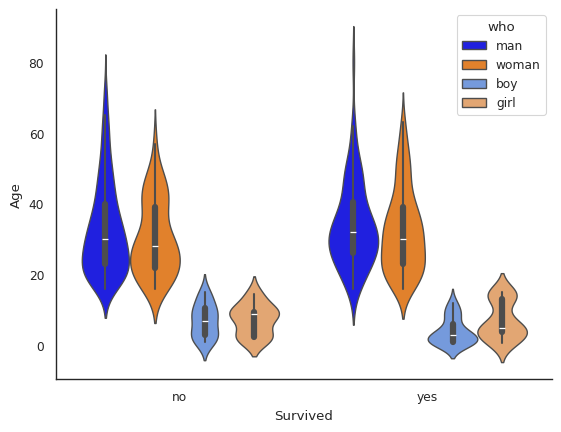

In [ ]:
axes3 = sns.violinplot(data=lab3_data, x='survived_str', y='age', hue='who', palette=colscheme)
axes3.set(xlabel='Survived', ylabel='Age')
sns.despine()

# Plot #4

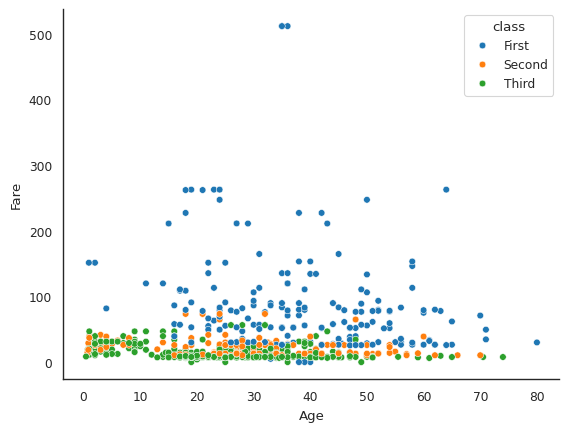

In [ ]:
axes4 = sns.scatterplot(data=lab3_data, x='age', y='fare', hue='class')
axes4.set(xlabel='Age', ylabel='Fare')
sns.despine()

# Plot #5

In [ ]:
lab3_data_subset=lab3_data[['class','who','fare']]
lab3_data_subset=lab3_data_subset.dropna(how='any')
lab3_data_subsetAverage=lab3_data_subset.groupby(['class','who']).mean()
lab3_data_subsetAverage=lab3_data_subsetAverage.reset_index()
lab3_data_subsetAverage.head()

,class,who,fare
0,First,boy,117.802767
1,First,girl,160.962500
2,First,man,65.951086
3,First,woman,104.317995
4,Second,boy,27.306022


In [ ]:
matrix_data = lab3_data_subsetAverage.pivot(index='class', columns='who', values='fare')
matrix_data.head()

who,boy,girl,man,woman
class,,,,
First,117.802767,160.962500,65.951086,104.317995
Second,27.306022,29.240000,19.054124,20.868624
Third,27.716371,19.023753,11.340213,15.354351


[Text(0.5, 22.71666666666666, 'Demographic'),
 Text(49.91666666666667, 0.5, 'Boarding Class'),
 [Text(0.5, 0, 'boy'),
  Text(1.5, 0, 'girl'),
  Text(2.5, 0, 'man'),
  Text(3.5, 0, 'woman')]]

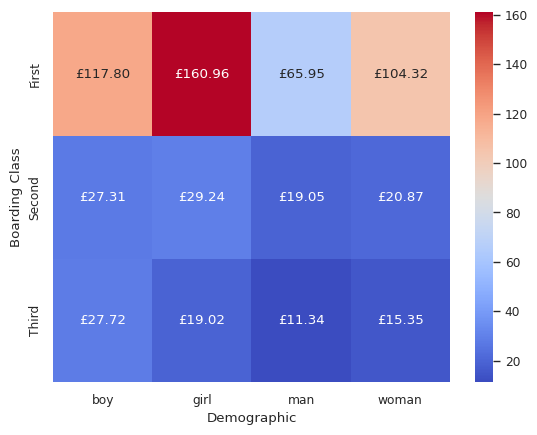

In [ ]:
axes5 = sns.heatmap(data=matrix_data, annot=True,fmt='.2f',cmap='coolwarm')
for text in axes5.texts: text.set_text('£' + text.get_text())
axes5.set(xlabel='Demographic', ylabel='Boarding Class', xticklabels=['boy','girl','man','woman'])

# Final plots:

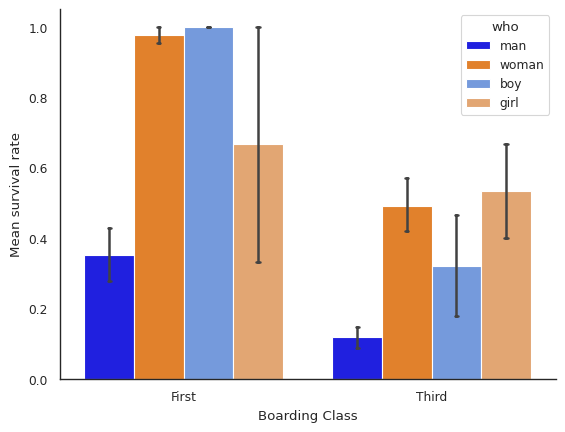

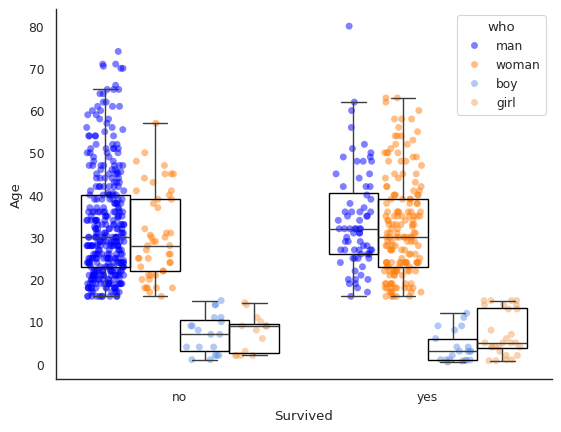

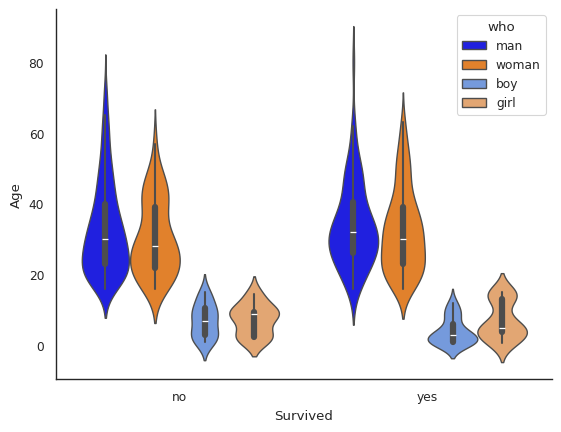

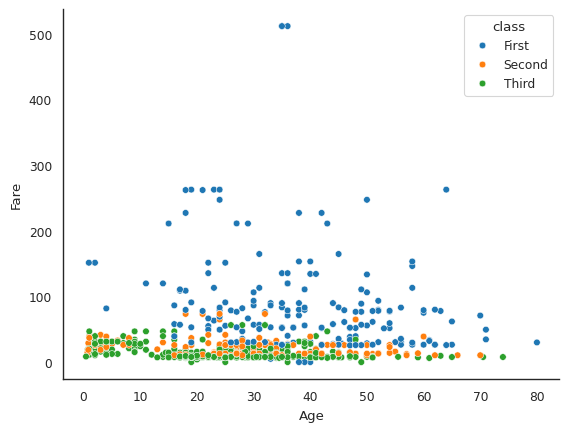

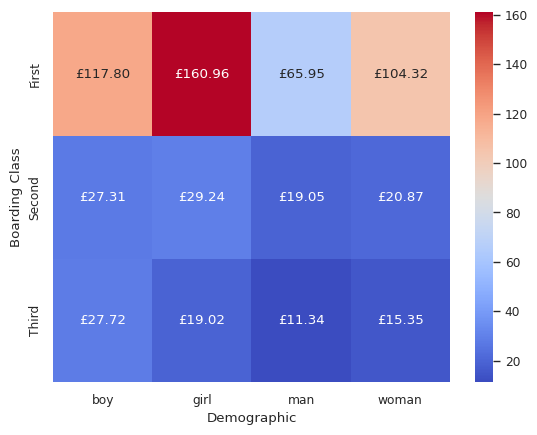